# Estimasi Parameter dari data untuk fungsi
Pada bagian ini diterangkan langkah untuk menentukan estimasi parameter sebuah fungsi yang dipilih dengan menggunakan data yang diberikan.
1. Data diberikan
2. Fungsi tebakan diberikan

Metode yang digunakan
+ leastsq pada scipy.optimize
+ lstsq pada scipy.linalg
+ lstsq pada numpy.linalg

In [1]:
# import modul
import pandas as pd
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
# import data yang tersimpan di excel
df=pd.read_excel("DATA/data-kuadrat.xls",usecols="A:B")
data=np.array(df)
data.shape

(40, 2)

In [3]:
data[:7,:]

array([[1.1       , 4.8189829 ],
       [1.2       , 4.93924238],
       [1.3       , 4.7581577 ],
       [1.4       , 5.62558316],
       [1.5       , 5.56495827],
       [1.6       , 5.58645838],
       [1.7       , 6.82163022]])

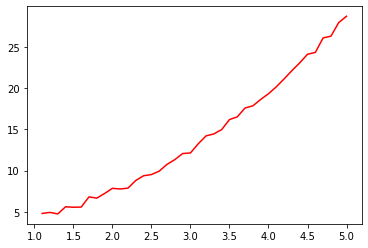

In [4]:
plt.figure(1)
plt.plot(data[:,0],data[:,1],'r-')
plt.show()

Karena mirip fungsi kuadrat, dimisalkan fungsi tebakan adalah fungsi kuadrat $y=ax^2+bx+c$

## Metode 1: Residu dengan leastsq
Diperlukan beberapa procedure
+ procedure fungsi tebakan
 - input adalah parameter
 - domain dianggap global
+ procedure residu/sisa
 - menghitung selisih data dan tebakan
 - output dalam vektor. Jika perhitungan matriks, perlu di flatten()

In [5]:
def fungsitebakan(p):
    a,b,c=p
    x=data[:,0]
    return a*x**2+b*x+c

In [6]:
def sisa(p):
    eror=data[:,1]-fungsitebakan(p)
    return eror.flatten()

In [7]:
# menentukan nilai parameter dengan leastsq
initpar=[0.6,0.2,0.4]
param=leastsq(sisa,initpar)[0]

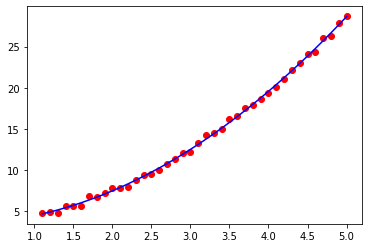

In [8]:
plt.figure(1)
plt.plot(data[:,0],data[:,1],'ro') # data asli
plt.plot(data[:,0],fungsitebakan(param),'b-') # tebakan
plt.show()

## Metode 2: lstsq pada scipy

In [9]:
from scipy.linalg import lstsq

In [10]:
# extract data
x=data[:,0]
y=data[:,1]

In [11]:
# fungsi tebakan adalah y=ax^2+bx+c
# Buat matriks M, berisi [x^2,x^1,1]
M=x[:,np.newaxis]**[2,1,0]
print(M[0:7,:])

[[1.21 1.1  1.  ]
 [1.44 1.2  1.  ]
 [1.69 1.3  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]
 [2.56 1.6  1.  ]
 [2.89 1.7  1.  ]]


In [12]:
# cek hasil
param2,res,rnk,s=lstsq(M,y)
print(param2)
print(param)

[ 1.01024483 -0.01115397  3.4442283 ]
[ 1.01024484 -0.01115393  3.44422822]


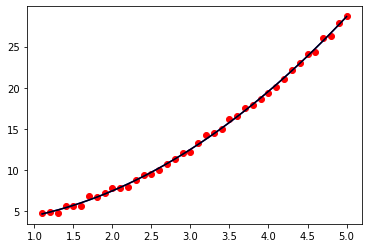

In [13]:
# plot bersamaan
plt.figure(1)
plt.plot(data[:,0],data[:,1],'ro') # data asli
plt.plot(data[:,0],fungsitebakan(param),'b-') # tebakan metode 1
plt.plot(data[:,0],fungsitebakan(param2),'k-') # tebakan metode 2
plt.show()

$R^2$ mengindikasikan proporsi/persentase data yang terletak di sekitar garis yang dihasilkan dari fungsi tebakan. Semakin besar nilai $R^2$ maka berarti titik-titik semakin besar proporsinya didekati garis fungsi tebakan yang berarti bahwa fungsi tebakan memiliki kualitas yang baik.

In [14]:
# check/hitung R2, MSE
from sklearn.metrics import r2_score
r2_metode_1=r2_score(y,fungsitebakan(param))
r2_metode_2=r2_score(y,fungsitebakan(param2))
print(r2_metode_1)
print(r2_metode_1)

0.9987085326666754
0.9987085326666754


## Metode 3: lstsq pada numpy

In [15]:
# Membuat matriks M, identik dengan scipy
# berbeda cara penulisan dengan menggunakan vstack,
# menggabungkan kolom
x0=np.ones(np.size(data[:,0]))
x1=data[:,0]
x2=data[:,0]**2
M=np.vstack([x2,x1,x0]).T
M.shape

(40, 3)

In [16]:
# Solusi menggunakan numpy
param3,res,rnk,s=np.linalg.lstsq(M,data[:,1],rcond=0)
print(param)
print(param2)
print(param3)

[ 1.01024484 -0.01115393  3.44422822]
[ 1.01024483 -0.01115397  3.4442283 ]
[ 1.01024483 -0.01115397  3.4442283 ]
